In [4]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pylab as plt
import numpy as np

2.0.0


In [5]:
train_ds = tf.data.Dataset.list_files('/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/*')

In [7]:
for f in train_ds.take(15):
  print(f.numpy())

b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0006R0_f03000.png'
b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0016E5_04830.png'
b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0016E5_06510.png'
b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0016E5_00600.png'
b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0001TP_007140.png'
b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0016E5_06750.png'
b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0006R0_f01950.png'
b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0016E5_06090.png'
b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0016E5_00990.png'
b'/home/giovi/data/work/machine_learning/projects/en

In [8]:
test_path = "/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0001TP_006810.png"

In [9]:
parts = tf.strings.split(test_path,'/')

In [10]:
test = tf.concat([parts,['ciao']],0)

In [11]:
test.numpy().tolist()

[b'',
 b'home',
 b'giovi',
 b'data',
 b'work',
 b'machine_learning',
 b'projects',
 b'enet_tensorflow',
 b'dataset',
 b'train',
 b'images',
 b'0001TP_006810.png',
 b'ciao']

In [56]:
def process_path(file_path):
    
    # img file
    img_file = file_path
    
    # label file
    label_file = tf.strings.regex_replace(img_file, "/images", "/labels")
    print(img_file,label_file)
    
    # decoding image
    img = tf.io.read_file(img_file)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
        
    # decoding label
    iml = tf.io.read_file(label_file)
    iml = tf.image.decode_png(iml,channels=1)
        
    return img, iml

In [57]:
process_path(test_path)

/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/images/0001TP_006810.png tf.Tensor(b'/home/giovi/data/work/machine_learning/projects/enet_tensorflow/dataset/train/labels/0001TP_006810.png', shape=(), dtype=string)


(<tf.Tensor: id=3034234, shape=(360, 480, 3), dtype=float32, numpy=
 array([[[0.23137257, 0.27058825, 0.25882354],
         [0.2392157 , 0.28235295, 0.26666668],
         [0.2509804 , 0.29411766, 0.2784314 ],
         ...,
         [0.07843138, 0.09411766, 0.09803922],
         [0.07450981, 0.09019608, 0.09411766],
         [0.08235294, 0.08627451, 0.10588236]],
 
        [[0.2392157 , 0.27450982, 0.2627451 ],
         [0.23529413, 0.2784314 , 0.2627451 ],
         [0.21568629, 0.2509804 , 0.2392157 ],
         ...,
         [0.07450981, 0.09019608, 0.09411766],
         [0.07058824, 0.08627451, 0.09019608],
         [0.07058824, 0.07450981, 0.09019608]],
 
        [[0.22352943, 0.25882354, 0.24705884],
         [0.24313727, 0.28627452, 0.27058825],
         [0.227451  , 0.2627451 , 0.2509804 ],
         ...,
         [0.07450981, 0.09019608, 0.09803922],
         [0.06666667, 0.08235294, 0.08627451],
         [0.07058824, 0.07450981, 0.08627451]],
 
        ...,
 
        [[0.06666667

In [58]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_train_ds = train_ds.map(process_path)

Tensor("args_0:0", shape=(), dtype=string) Tensor("StaticRegexReplace:0", shape=(), dtype=string)


In [59]:
label_list = []
for img, label in labeled_train_ds.take(-1):
    label_list.append(label.numpy())
label_array =np.array(label_list).flatten()

In [60]:
len(label_list)

367

In [61]:
print(label_list[0].shape)

(360, 480, 1)


In [62]:
label_array.shape

(63417600,)

In [63]:
num_classes=12
each_class = np.bincount(label_array, minlength=num_classes)

In [64]:
each_class

array([10682767, 14750079,   623349, 20076880,  2845085,  6166762,
         743859,   714595,  3719877,   405385,   184967,  2503995])

In [65]:
prospensity_score = each_class / len(label_array)

In [66]:
class_weights = 1 / (np.log(1.02 + prospensity_score))

In [67]:
class_weights

array([ 5.79203481,  4.44028773, 34.02166463,  3.44690044, 15.91194352,
        9.02023585, 32.01377376, 32.47892445, 13.20714089, 38.38765298,
       44.13450551, 17.30636391])

In [68]:
test  = [1,1,2,4,4,6,7,8,8,8,8,8,9,1,2,0,12,14]

In [69]:
testbin = np.bincount(test)

In [70]:
testbin

array([1, 3, 2, 0, 2, 0, 1, 1, 5, 1, 0, 0, 1, 0, 1])

In [73]:
for img, label in labeled_train_ds.take(10):
    img_out, label_out = img, label

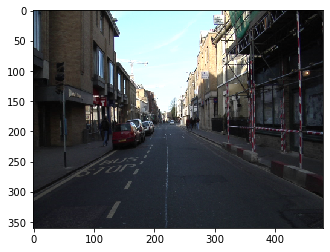

In [74]:
plt.imshow(img_out)

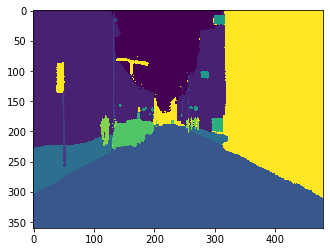

In [81]:
plt.imshow(label_out.numpy()[:,:,0])